In [394]:
#Importing Necessary Libraries

In [395]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [396]:
Train_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv') #Train Data set
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [397]:
Test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv') #Test Dataset
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [398]:
Train_data.shape #Shape of Train dataset

(8523, 12)

In [399]:
Test_data.shape #Shape of Test dataset

(5681, 11)

We have 8523 rows and 12 columns in our Train datasets and We have 5681 rows and 11 columns in our Test datasets, Our Target variable(Item_Outlet_Sales) is continuous in nature, hence we will focus only on regression models.

Now let's check the null value in our Datasets.


In [400]:
Train_data.isnull().sum() #Checking Nulls in our Train Dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have missing values in Item_Weight and Outlet_Size column in our Train Dataset. We need to fill these value before proceeding.

In [401]:
Test_data.isnull().sum() #Checking Nulls in our Test Dataset

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [402]:
Train_data.info() #Checking all the column's datatype in our Train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Our Train dataset constitutes of Object, numerical datatypes.
Let's check all our columns with object datatypes

In [403]:
Train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We can see that our data in Item_Fat_Content column is filled with some spelling errors and we need to deal with it.

In [404]:
Train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [405]:
Train_data['Item_Fat_Content'].value_counts() #Checking number of classes in this columns now

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [406]:
Train_data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX04     9
FDT07     9
         ..
FDT35     1
FDQ60     1
FDN52     1
FDO33     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [407]:
Train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [408]:
Train_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [409]:
Train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [410]:
Train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [411]:
Train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [412]:
Train_data.corr()['Item_Weight']

Item_Weight                  1.000000
Item_Visibility             -0.014048
Item_MRP                     0.027141
Outlet_Establishment_Year   -0.011588
Item_Outlet_Sales            0.014123
Name: Item_Weight, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

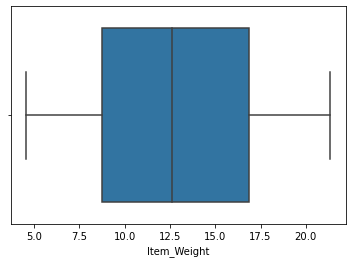

In [413]:
sns.boxplot('Item_Weight',data=Train_data) # Let's plot Item_weight column data in boxplot to check for any outlier before filling out the null values.

Item_weight is numerical data type and there are no outliers, hence we can fill nul values with the mean of the column

In [414]:
Train_data['Item_Weight'] = Train_data['Item_Weight'].fillna(Train_data['Item_Weight'].mean())

Now let's deal with our Outlet_Size column having null vlaue.
It constitutes categorical data hence we can apply the mode to fill our null values

In [415]:
Train_data['Outlet_Size'] = Train_data['Outlet_Size'].fillna(Train_data['Outlet_Size'].mode()[0])

In [416]:
Train_data['Age_since_Established'] = Train_data['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
Train_data = Train_data.drop(columns=['Outlet_Establishment_Year'])
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_since_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


We need to alter the information from our test data too.

In [417]:
Test_data['Age_since_Established'] = Test_data['Outlet_Establishment_Year'].apply(lambda x: 2021 - x)
Test_data = Test_data.drop(columns=['Outlet_Establishment_Year'])

Our new column is making more sense now.
Let's do our EDA part

# Univariate Analysis

In [418]:
# Check the name of coloumns which contain string
Train_data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

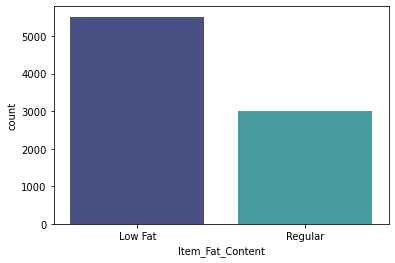

In [419]:
sns.countplot('Item_Fat_Content',data=Train_data,palette="mako")

Low Fat Item sold more than Regular 

# #Item Type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

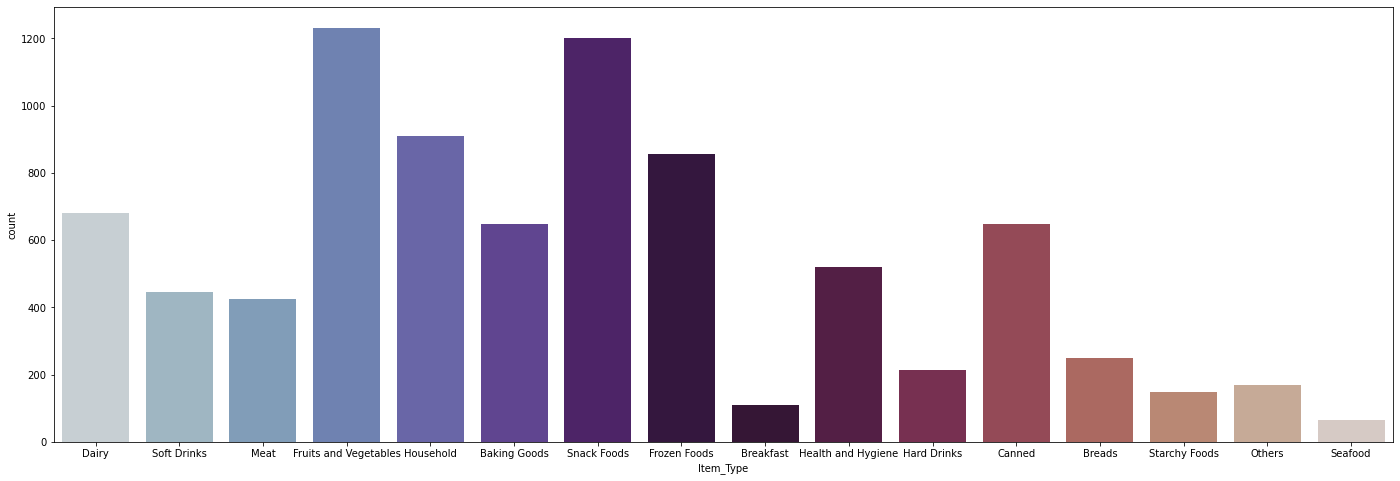

In [420]:
plt.figure(figsize=(24,8))
sns.countplot('Item_Type',data=Train_data,palette='twilight')

Fruits and vegetables, snack foods are among highly bought

# Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

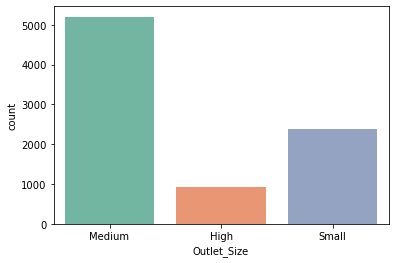

In [421]:
sns.countplot('Outlet_Size',data=Train_data,palette='Set2')

Medium outlets are more in numbers.

# Outlet Location

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

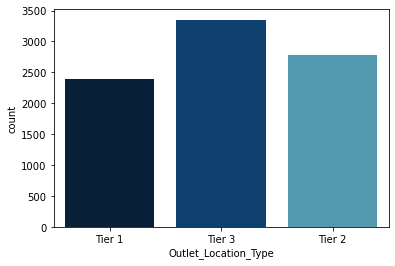

In [422]:
sns.countplot('Outlet_Location_Type',data=Train_data,palette='ocean')

Maximum stores in Tier 3

# Outlet_Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

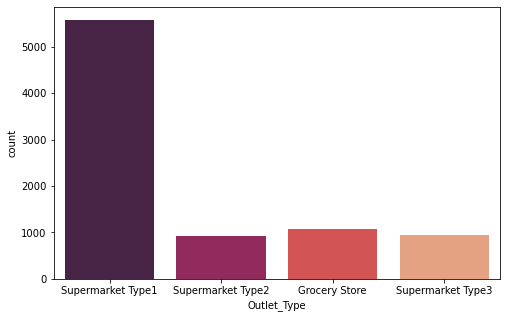

In [423]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=Train_data,palette='rocket')

Maximum number of supermarkets are of Type1 

# Bivariate Analysis

# Item Fat content to Item outlet sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

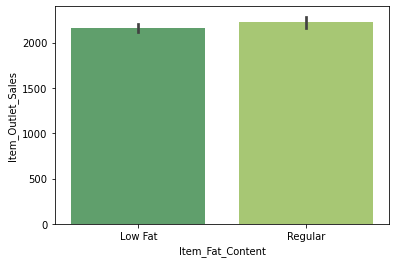

In [424]:
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=Train_data,palette='summer')

Low Fat and Regular both are contributing equally to the revenue generation

# Item visibility to Item outlet sales

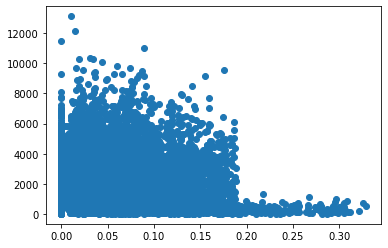

In [425]:
plt.scatter(x='Item_Visibility',y = 'Item_Outlet_Sales',data=Train_data)

It seems that where the visiblity of Items is Zero, which suggest those items kept behind in shelf and almost have no visiblity can also be sold. This show Consumer tend to search for their own products

# Item type to Item output sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

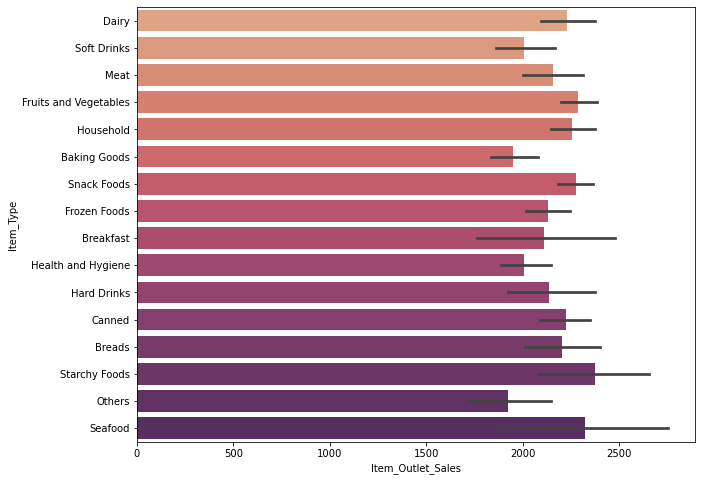

In [426]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=Train_data, palette='flare')

Although Fruits and Vegetables unit sold are high, however revenue generated by Seafood is much higher.

# MRP to Item outlet sales

Text(0, 0.5, 'Item Outlet Sales')

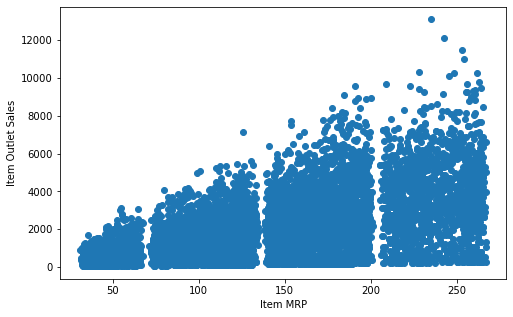

In [427]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=Train_data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Items with higher MRP are generating maximum revenue

# Outlet Size to Item outlet sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

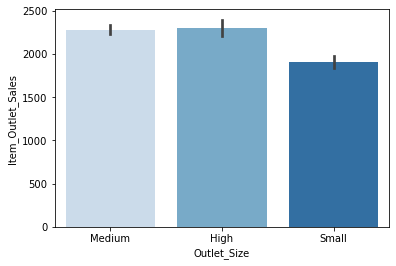

In [428]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=Train_data,palette='Blues')

 Medium size outlet have maximum revenue generation power

# Outlet Location to Item outlet sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

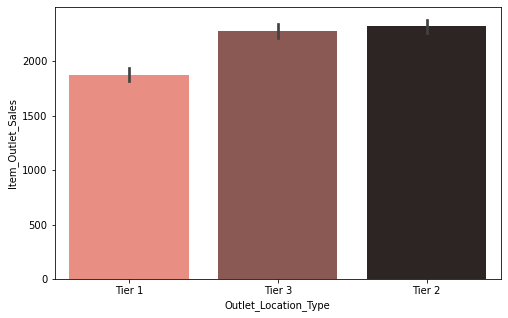

In [429]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=Train_data,palette='dark:salmon_r')

Tier 2 & 3 have more revenue generation power although we have maximum number ot outlet in Tier 3 cities so it justify the number

# Multivariate Analysis

# Item Type by Item Fat Content to Item Outlet Sales

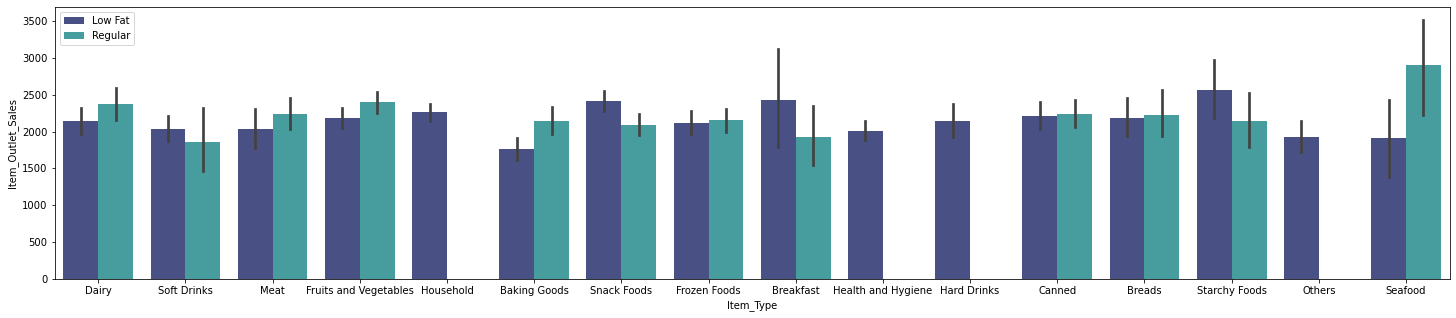

In [430]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=Train_data,palette='mako')
plt.legend()

Seafood is generating highest revenuewith Regular and Breakfast is generating higher revenue with Low Fat

#  Outlet Location Type by Outlet Type to Item Outlet Sales

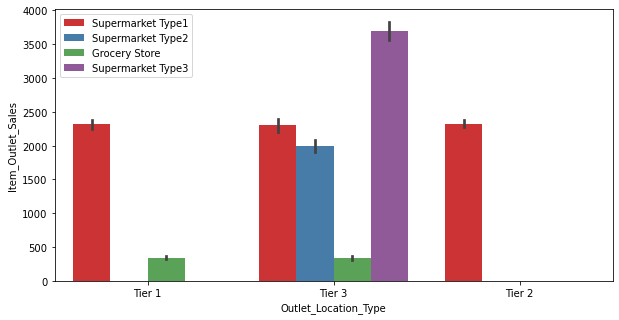

In [431]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=Train_data,palette='Set1')
plt.legend()

There is no revenue from Spermarket Type2 and Type 3 in Tier 1 location and only from Supermarket Type 1 in Tier 2

In [432]:
#Check the name of coloumns which contain numerical value
Train_data.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [433]:
Numerical_data= Train_data.drop(columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], inplace = False)


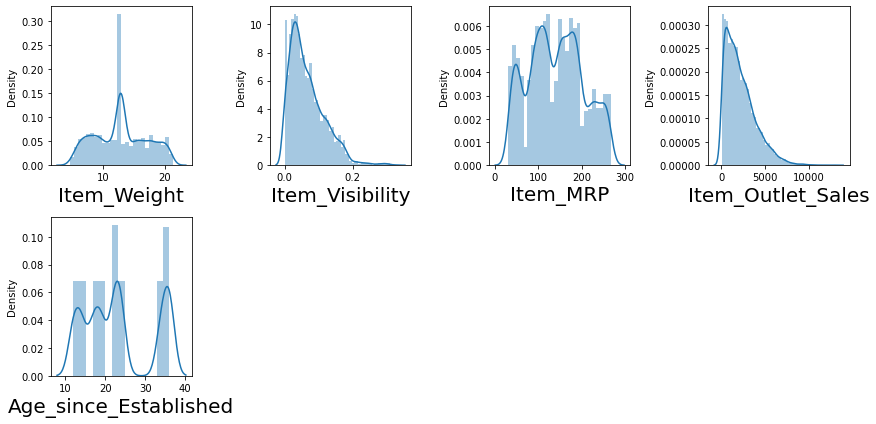

In [434]:
plt.figure(figsize = (12,6), facecolor = 'white')
plotnumber = 1
for column in Numerical_data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(x=Numerical_data[column])
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.tight_layout()

Item_outlet_sales is our target variable but we need to remove skewness from Item_Visibility.
Let's check the outliers first

<AxesSubplot:xlabel='Item_Visibility'>

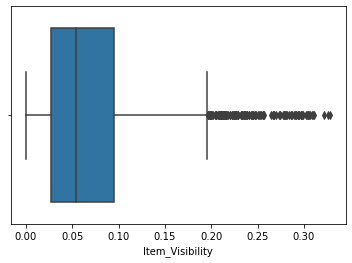

In [435]:
sns.boxplot('Item_Visibility',data=Numerical_data)

# IQR method

In [436]:
percentile25 = Numerical_data['Item_Visibility'].quantile(0.25)
percentile75 = Numerical_data['Item_Visibility'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

upper_limit

0.195979015

In [437]:
Numerical_data = Numerical_data[Numerical_data['Item_Visibility'] < upper_limit]
Numerical_data.shape

(8379, 5)

In [438]:
# Numerical_data = Train_data

In [439]:
# Numerical_data.shape

In [440]:
# new_train_data = Numerical_data

In [441]:
# new_train_data.shape

In [442]:
Train_data['Item_Visibility'] = Numerical_data['Item_Visibility']

In [443]:
Train_data = Train_data[Train_data['Item_Visibility'].notna()] #Removing rows where there is NAN values

In [444]:
Train_data.shape

(8379, 12)

# Encoding

In [445]:
#feature engineering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Identifier','Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for i in var_mod:
    Train_data[i] = le.fit_transform(Train_data[i])

In [446]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_since_Established
0,FDA15,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,23
4,NCD19,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,34


In [447]:
# from sklearn.preprocessing import OneHotEncoder
# Train_data = pd.get_dummies(data=Train_data, drop_first=True)
# Train_data.shape

In [448]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_since_Established
0,FDA15,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,22
1,DRC01,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,12
2,FDN15,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,22
3,FDX07,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,23
4,NCD19,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,34


Item_Identifier is not relevant for the sales prediction hence we should drop it

In [449]:
Train_data = Train_data.drop(columns=['Item_Identifier'])

# Correlation

In [450]:
Train_data.drop('Item_Outlet_Sales', axis = 1).corrwith(Train_data.Item_Outlet_Sales)

Item_Weight              0.009691
Item_Fat_Content         0.021670
Item_Visibility         -0.073755
Item_Type                0.016017
Item_MRP                 0.577367
Outlet_Identifier        0.148534
Outlet_Size             -0.076552
Outlet_Location_Type     0.087446
Outlet_Type              0.385038
Age_since_Established    0.065382
dtype: float64

Score is less than 5 and is very less hence no multicollinearity exists

# Train test split

In [451]:
x = Train_data.drop(columns = ['Item_Outlet_Sales'], axis = 1)# Dividing our data into features and labels
y = Train_data['Item_Outlet_Sales']

# Scaling

In [452]:
from sklearn.preprocessing import StandardScaler # Scaling our featture data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [453]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size = 0.25, random_state=1)

# Linear regression Model

In [454]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [455]:
regression.score(x_train, y_train)

0.5050908271630854

In [456]:
#50.50%

In [457]:
regression.score(x_test, y_test)

0.5067941064533819

In [458]:
#50.67%

# Lasso regression

In [459]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [460]:
alpha = lasscv.alpha_ # finding alpha 
alpha

0.012398582482746185

In [461]:
lasso_reg = Lasso(alpha)  # Training our model with alpha
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.012398582482746185)

In [462]:
lasso_reg.score(x_train, y_train)

0.505090800380294

In [463]:
#50.50%

In [464]:
lassor_pred = lasso_reg.predict(x_test)

In [465]:
lasso_reg.score(x_test, y_test)

0.5067811246448426

In [466]:
from sklearn import metrics
metrics.r2_score(y_test, lassor_pred) #R2_Score

0.5067811246448426

In [467]:
#50.67

# Ridge regression Model

In [468]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [469]:
ridgecv.fit(x_train, y_train) # Training for alpha

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [470]:
ridgecv.alpha_ # finding alpha

0.002

In [471]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train) # training our model with alpha

Ridge(alpha=0.002)

In [472]:
ridge_model.score(x_train, y_train)

0.5050908271564944

In [473]:
#50.50

In [474]:
ridge_pred = ridge_model.predict(x_test)

In [475]:
metrics.r2_score(y_test, ridge_pred)# R2 Score

0.5067938936086089

In [476]:
#50.67, 
# Simple Regression, Lasso regression and Ridge regression
# are giving the same result

# # Ada-Boost regressor

In [477]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()


In [478]:
ada.fit(x_train, y_train) # Model Training

AdaBoostRegressor()

In [479]:
ada.score(x_train, y_train)

0.4686379002830735

In [481]:
ada_pred = ada.predict(x_test) #predictionmetrics.r2_score(y_test, ada_pred)# R2 Score

In [482]:
metrics.r2_score(y_test, ada_pred)# R2 Score

0.4635251028759718

# Random forest regression Model

In [483]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5) #without hyperparameter tuning

In [484]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [485]:
rf.score(x_train, y_train)

0.6024484617118329

In [486]:
rf_y_pred = rf.predict(x_test)

In [487]:
metrics.r2_score(y_test, rf_y_pred)# R2 Score

0.5910777568265975

In [488]:
# Score is better than our previous models
# Now let's us apply hyperparameter tuning

In [489]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[25,35],
         'max_depth':[9,20],
         'min_samples_split':[4,8],
         'min_samples_leaf':[10,25],
         }

         
grd = GridSearchCV(rf, param_grid = params)
grd.fit(x_train, y_train)
print('best_param = >', grd.best_params_)

best_param = > {'max_depth': 9, 'min_samples_leaf': 25, 'min_samples_split': 4, 'n_estimators': 25}


In [490]:
RF = RandomForestRegressor(max_depth=9, min_samples_leaf=25,
                       min_samples_split=8, n_estimators=35)

In [491]:
RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=25, min_samples_split=8,
                      n_estimators=35)

In [492]:
RF.score(x_train, y_train)

0.6312725245461932

In [493]:
RF_y_pred = RF.predict(x_test)

In [494]:
metrics.r2_score(y_test, RF_y_pred)# R2 Score

0.5924086336880807

In [495]:
#We can see that our score slightly improves with hyperparameter tuning

# In above 5 diffrent models, Random forest Regression model is giving us the best score. Let's save our model.

# Saving our model

In [496]:
import pickle
filename = "Big Data Mart Sales"
pickle.dump(RF, open(filename,'wb'))